In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Data 

In [49]:
data = pd.read_csv("Global_superstore2_v2.csv")    # download the file first 

#url = 'https://raw.githubusercontent.com/jmk495/6103_Final_Project/main/Global_Superstore2.csv' # not working, probably needs access
#data = pd.read_csv(url)

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,5/2/13,7/2/13,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,5/11/13,6/11/13,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [50]:
# Removing irrelevant columns
df = data.drop(['Row ID', 'Order ID', 'Ship Date', 'Customer ID', 'Customer Name',
              'Postal Code', 'Product ID', 'Product Name'], axis = 1)
df.head()

,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,31-07-2012,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical
1,5/2/13,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical
2,17-10-2013,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium
3,28-01-2013,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium
4,5/11/13,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical


In [51]:
# Number of categories (levels) in each categorical variable:

for i in df:
    if df[i].dtype == ('object' or 'category'):
        print(i, len(df[i].unique()))

Order Date 1430
Ship Mode 4
Segment 3
City 3636
State 1094
Country 147
Market 7
Region 13
Category 3
Sub-Category 17
Order Priority 4


### Monthly sales for all categories 

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M')  # setting to monthly steps

# Convert 'YearMonth' to timestamp
df['YearMonth'] = df['YearMonth'].dt.to_timestamp()

category_sales = df.groupby(['YearMonth', 'Category'])['Sales'].sum().reset_index()
sub_category_sales = df.groupby(['YearMonth', 'Category', 'Sub-Category'])['Sales'].sum().reset_index()

plt.figure(figsize = (14, 6))
sns.lineplot(x = 'YearMonth', y = 'Sales', hue = 'Category', data = category_sales, markers = True)
plt.title('Category-wise Sales Variation Over Time')
plt.xlabel('Year-Month', fontsize = 14)
plt.ylabel('Total Sales', fontsize = 14)
plt.xticks(rotation = 45)
plt.legend(title='Category', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

/var/folders/q6/45h2vzh90q58p301_cmtq1nw0000gn/T/ipykernel_59402/2542287893.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


ValueError: time data "5/2/13" doesn't match format "%d-%m-%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

### Sub-category sales  

KeyError: "['YearMonth'] not in index"

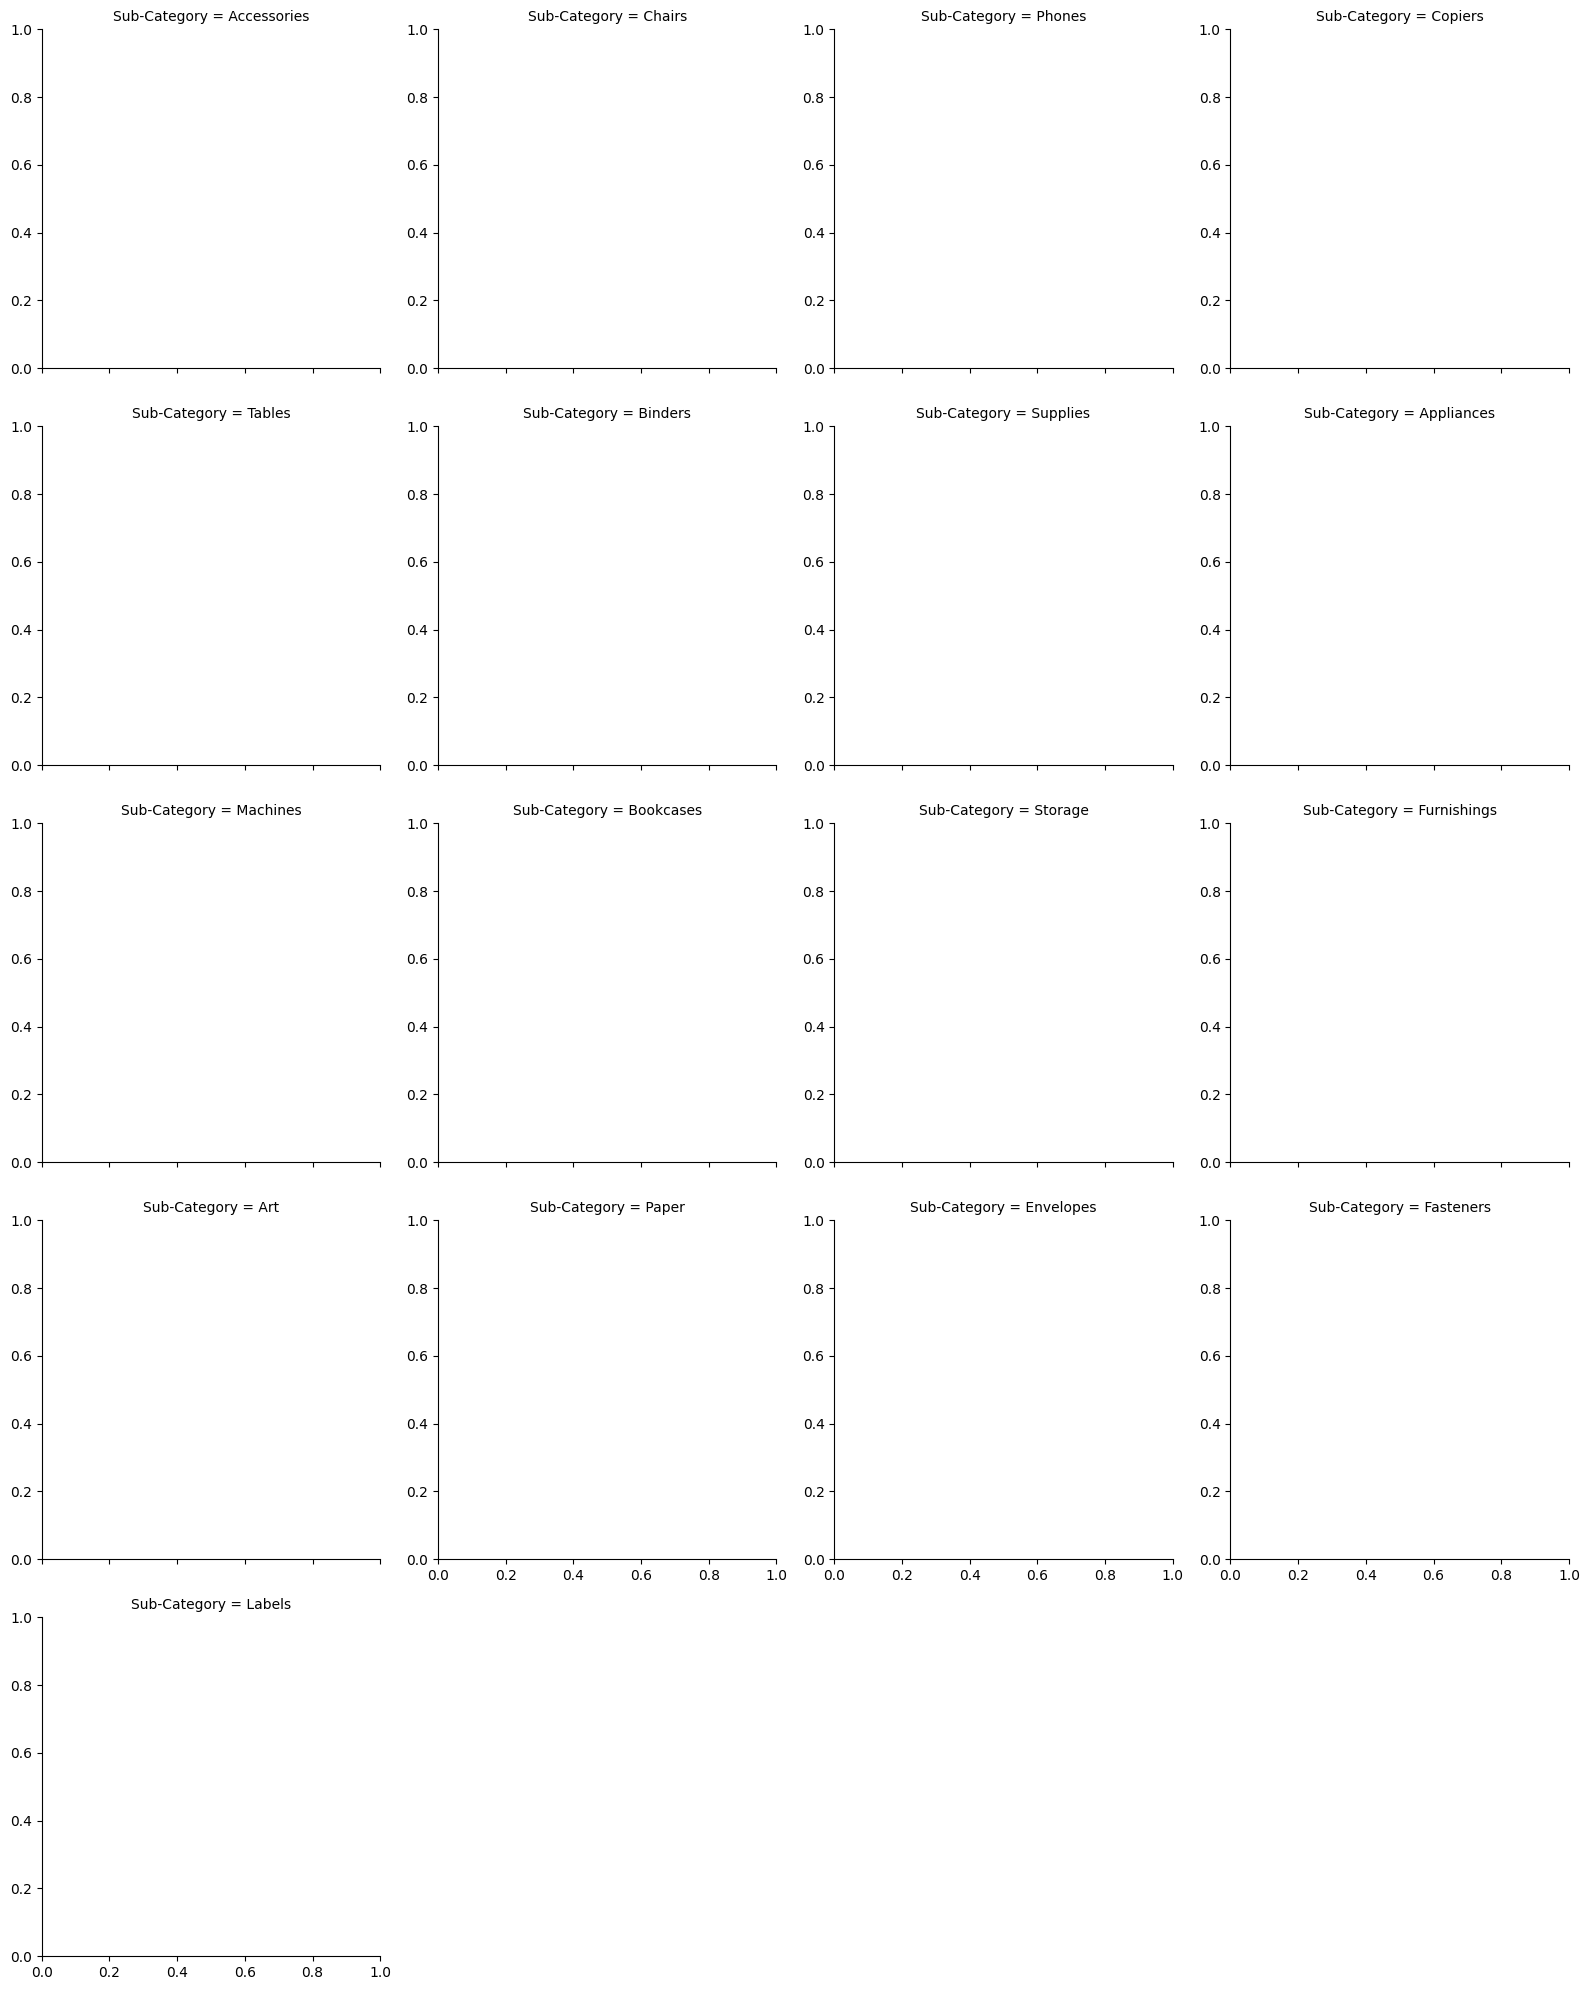

In [52]:
unique_subcategories = df['Sub-Category'].unique()

g = sns.FacetGrid(df, col = 'Sub-Category', col_wrap = 4, height = 4, sharey = False)
g.map(sns.lineplot, 'YearMonth', 'Sales')

g.fig.suptitle('Sub-Category-wise Sales Variation Over Time (Monthly)', y = 1.02)
g.set_axis_labels('Year-Month', 'Total Sales')
g.set_xticklabels(rotation = 45)
plt.show()

### Correlation among numerical features 

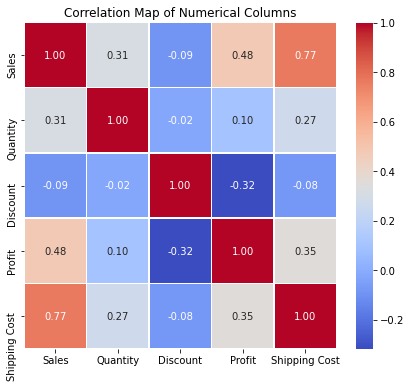

In [7]:
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
numerical_df = df[numerical_columns]

correlation_matrix = numerical_df.corr()

plt.figure(figsize = (7, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = .5)
plt.title('Correlation Map of Numerical Columns')
plt.show()

CORRELATION PLOTS

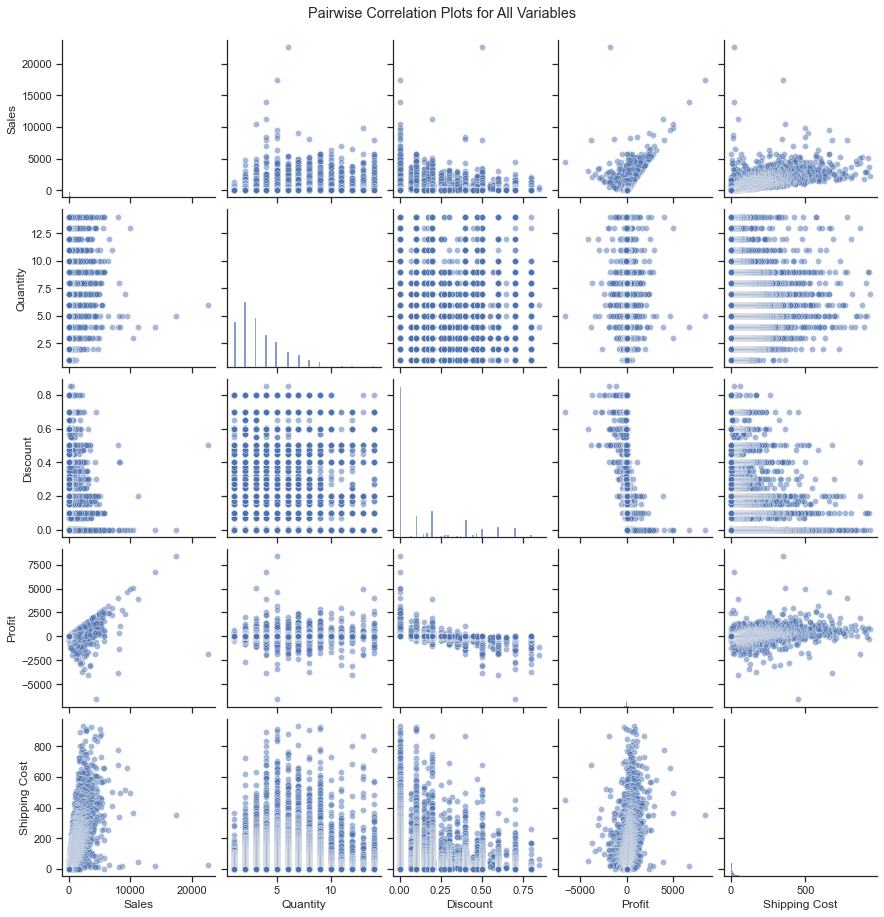

In [8]:
sns.set(style = "ticks")
sns.pairplot(df, plot_kws = {'alpha': 0.5})

plt.suptitle('Pairwise Correlation Plots for All Variables', y = 1.02)
plt.show()

In [ ]:
"""
selected_columns = ['Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
                    'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']

numeric_columns = df[selected_columns].select_dtypes(include = ['float64', 'int64']).columns  # numeric features
categorical_columns = df[selected_columns].select_dtypes(include = 'object').columns          # categorical features

sns.set(style = "ticks")
sns.pairplot(df[numeric_columns], plot_kws = {'alpha': 0.5})  

# Plot pair plots for categorical variables with different colors for each category
for cat_column in categorical_columns:
    sns.pairplot(df, hue = cat_column, palette = 'Set1', vars = numeric_columns, plot_kws = {'alpha': 0.5})

# Adjust layout
plt.suptitle('Pairwise Correlation Plots for Selected Variables with Color by Category', y = 1.02)
plt.show()
"""

ENCODING CATEGORICAL VARIABLES WITH LOWER CARDINALITY

In [24]:
# Currently, the threshold is set to 20 categories

categorical_features = df.select_dtypes(include = ['object', 'category']).columns
low_cardinality_features = [feature for feature in categorical_features if df[feature].nunique() <= 20]

df2 = df.copy()     # the new dataframe with encoded categorical variables

label_mappings = {}

for feature in low_cardinality_features:
    encoded_cols = pd.get_dummies(df2[feature], prefix = feature, drop_first = True)
    label_mappings[feature] = dict(enumerate(df2[feature].astype('category').cat.categories))
    df2 = pd.concat([df2, encoded_cols], axis = 1)

print("Label Mappings:", label_mappings)
df2.head()

Label Mappings: {'Ship Mode': {0: 'First Class', 1: 'Same Day', 2: 'Second Class', 3: 'Standard Class'}, 'Segment': {0: 'Consumer', 1: 'Corporate', 2: 'Home Office'}, 'Market': {0: 'APAC', 1: 'Africa', 2: 'Canada', 3: 'EMEA', 4: 'EU', 5: 'LATAM', 6: 'US'}, 'Region': {0: 'Africa', 1: 'Canada', 2: 'Caribbean', 3: 'Central', 4: 'Central Asia', 5: 'EMEA', 6: 'East', 7: 'North', 8: 'North Asia', 9: 'Oceania', 10: 'South', 11: 'Southeast Asia', 12: 'West'}, 'Category': {0: 'Furniture', 1: 'Office Supplies', 2: 'Technology'}, 'Sub-Category': {0: 'Accessories', 1: 'Appliances', 2: 'Art', 3: 'Binders', 4: 'Bookcases', 5: 'Chairs', 6: 'Copiers', 7: 'Envelopes', 8: 'Fasteners', 9: 'Furnishings', 10: 'Labels', 11: 'Machines', 12: 'Paper', 13: 'Phones', 14: 'Storage', 15: 'Supplies', 16: 'Tables'}, 'Order Priority': {0: 'Critical', 1: 'High', 2: 'Low', 3: 'Medium'}}


,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,31-07-2012,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,...,False,False,False,False,False,False,False,False,False,False
1,5/2/13,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,...,False,False,False,False,False,False,False,False,False,False
2,17-10-2013,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,...,False,False,False,True,False,False,False,False,False,True
3,28-01-2013,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,...,False,False,False,True,False,False,False,False,False,True
4,5/11/13,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,...,False,False,False,False,False,False,False,False,False,False


### WCSS method for optimal no. of clusters  
#### Currently, all the numeric and cateogrical features with cardinality less than the threshold are retained

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

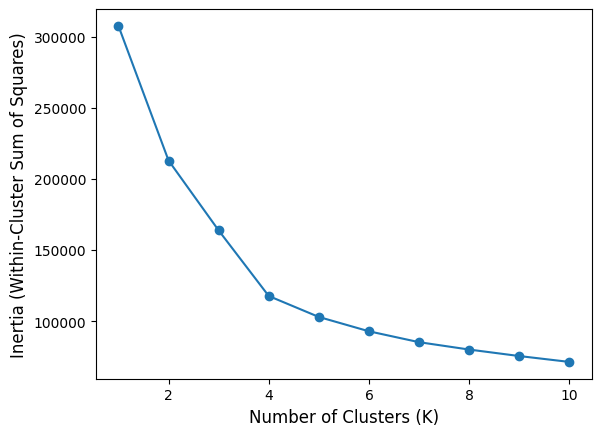

In [30]:
features_for_clustering = df2.select_dtypes(include = ['number']).columns   # features for clustering 
X = df2[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)    # feature scaling

# Optimal number of clusters using the elbow method (by WCSS method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), inertia, marker = 'o')
plt.xlabel('Number of Clusters (K)', fontsize = 12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize = 12)
plt.show()

In [55]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
plt.scatter(range(1, 11), inertia, marker = 'o')

def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
dfc = df2[['x','y']]
centroids = initiate_centroids(k, dfc)
centroids


KeyError: "None of [Index(['x', 'y'], dtype='object')] are in the [columns]"

In [ ]:
#Distance between centroids

def rsserr(a,b):
    return np.square(np.sum((a-b)**2)) 

#error for centroids
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

In [ ]:
#Assigning centeroids
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []
    for obs in range(n):
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)
    return assignation, assign_errors
#Centroid Positioning and errors
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


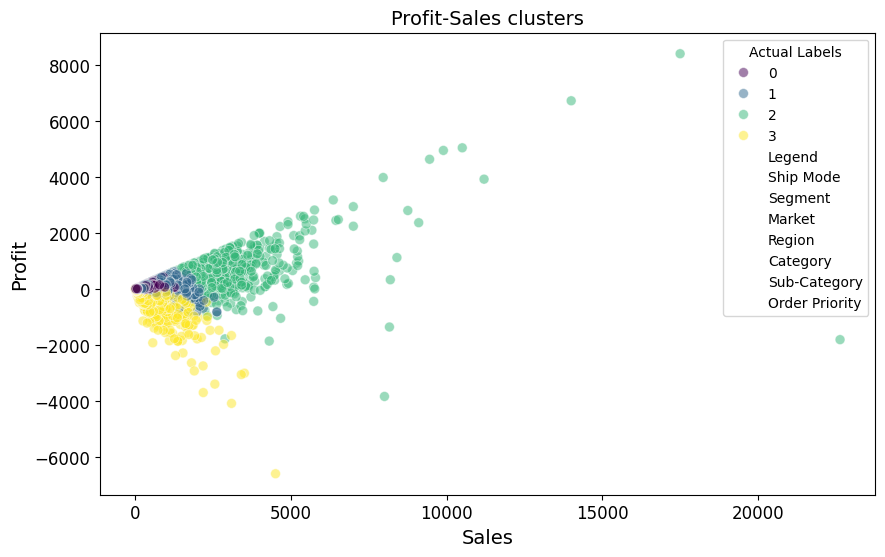

In [46]:
optimal_k = 4    # Update this based on the elbow method plot above

kmeans = KMeans(n_clusters = optimal_k, random_state = 42)   
df2['Cluster'] = kmeans.fit_predict(X_scaled)

legend_df = pd.DataFrame(label_mappings)

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Sales', y = 'Profit', hue = 'Cluster',
                s = 50, data = df2, palette = 'viridis',
                legend = 'full', alpha = 0.5)

plt.scatter([], [], label = 'Legend', alpha = 0)  # Empty scatter for the legend

for feature in low_cardinality_features:
    plt.scatter([], [], label = feature, alpha = 0)
plt.legend(title = 'Actual Labels', loc = 'upper right')
plt.title('Profit-Sales clusters', fontsize = 14)
plt.xlabel('Sales', fontsize = 14)
plt.ylabel('Profit', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()